<a href="https://colab.research.google.com/github/nishant-jhaa/osteoarthritis-/blob/main/ResNeT_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy as np
import os
from imutils import paths

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
images = "/content/drive/MyDrive/osteoarthritis/train"

In [4]:
folders = os.listdir(images)
print(folders)

['Osteoarthritis', 'Normal']


In [5]:
image_data= []
labels = []
label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

In [6]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [7]:
print(len(image_data),len(labels))

2350 2350


In [8]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350,)


In [10]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350, 2)


In [11]:
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [12]:
#Resnet model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [14]:
model = ResNet50(include_top = False,weights = 'imagenet',input_shape = (512,512,3))

94781440/94765736 [==============================] - 1s 0us/step


In [15]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [16]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f320b6cda50>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f320b7b5210>
2 <keras.layers.convolutional.Conv2D object at 0x7f320b2bf6d0>
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f320b2bfd10>
4 <keras.layers.core.activation.Activation object at 0x7f320a9ed850>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f31e14b4f10>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f31e1467050>
7 <keras.layers.convolutional.Conv2D object at 0x7f31e1482590>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f31e14726d0>
9 <keras.layers.core.activation.Activation object at 0x7f31e1493150>
10 <keras.layers.convolutional.Conv2D object at 0x7f31e1493d10>
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f31e148ce50>
12 <keras.layers.core.activation.Activation object at 0x7f31e14271d0>
13 <keras.layers.convolutional.Conv2D object at 

In [17]:
for layer in model.layers[:169]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)
adam = Adam(learning_rate=0.00003)
model.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
model.summary()

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [18]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_resnet = Model(model.input,fc3)
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [20]:
from keras.callbacks import ModelCheckpoint
adam = Adam(learning_rate=0.00001)
model_resnet.compile(loss='binary_crossentropy',optimizer = adam,metrics=['accuracy'])
filepath="osteoarthritis_detection_resnet50.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=2)
callbacks_list = [checkpoint]

In [21]:
hist = model_resnet.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 30,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 7.0525 - accuracy: 0.7820
Epoch 1: val_loss improved from inf to 7.13857, saving model to osteoarthritis_detection_resnet50.hdf5
67/67 [==============================] - 265s 4s/step - loss: 7.0525 - accuracy: 0.7820 - val_loss: 7.1386 - val_accuracy: 0.4681
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 6.2788 - accuracy: 0.8742
Epoch 2: val_loss improved from 7.13857 to 6.23010, saving model to osteoarthritis_detection_resnet50.hdf5
67/67 [==============================] - 248s 4s/step - loss: 6.2788 - accuracy: 0.8742 - val_loss: 6.2301 - val_accuracy: 0.8128
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 5.8018 - accuracy: 0.9054
Epoch 3: val_loss improved from 6.23010 to 6.11876, saving model to osteoarthritis_detection_resnet50.hdf5
67/67 [==============================] - 247s 4s/step - loss: 5.8018 - accuracy: 0.9054 - val_loss: 6.1188 - val_accuracy: 0.6809
Epoch 4/30


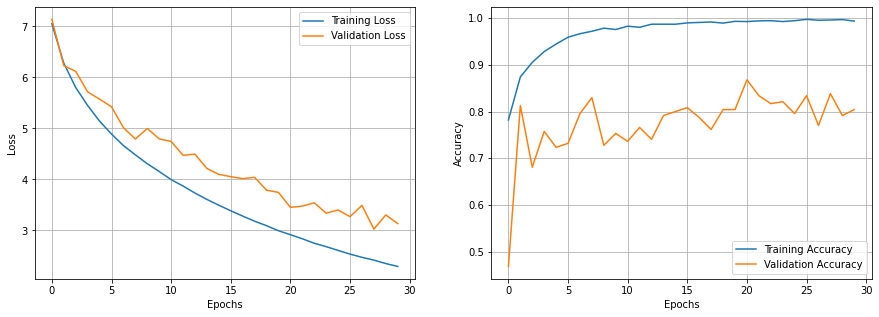

In [22]:
from matplotlib import pyplot as plt
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig("Figure 2 updated.jpg")

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.savefig("figure 3 updated.jpg")

In [29]:
model.evaluate(x_test, y_test)

NameError: ignored